In [10]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
# Define directories
train_dir = r"D:\Internships\Prodigy Infotech\DOGORCAT\train\train"
test_dir = r"D:\Internships\Prodigy Infotech\DOGORCAT\test1\test1"

# Define image parameters
img_height, img_width = 100, 100
batch_size = 32

In [11]:
# Load images and labels
def load_data(directory):
    images = []
    labels = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg"):
            img = load_img(os.path.join(directory, filename), target_size=(img_height, img_width))
            img_array = img_to_array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img_array)
            if "cat" in filename:
                labels.append(0)  # 0 for cat
            elif "dog" in filename:
                labels.append(1)  # 1 for dog
    return np.array(images), np.array(labels)

train_images, train_labels = load_data(train_dir)
test_images, test_labels = load_data(test_dir)

In [12]:
# Split data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)

# Define and train SVM model
svm_model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



In [13]:
svm_model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

history = svm_model.fit(train_images, train_labels, epochs=10, validation_data=(val_images, val_labels))

# Save the model
# svm_model.save("svm_model")

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 26s 41ms/step - accuracy: 0.4996 - loss: 1.1756 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4942 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5020 - loss: 0.6932 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5019 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.4990 - loss: 0.6932 - val_accuracy: 0.5030 - val_loss: 0.6931
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.5016 - loss: 0.6932 - val_accuracy: 0.4970 - val_loss: 0.6932
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 22s 36ms/step - accuracy: 0.4986 - loss: 0.6932 - 

C:\Users\conta\AppData\Local\Temp\ipykernel_24844\3216037963.py:34: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


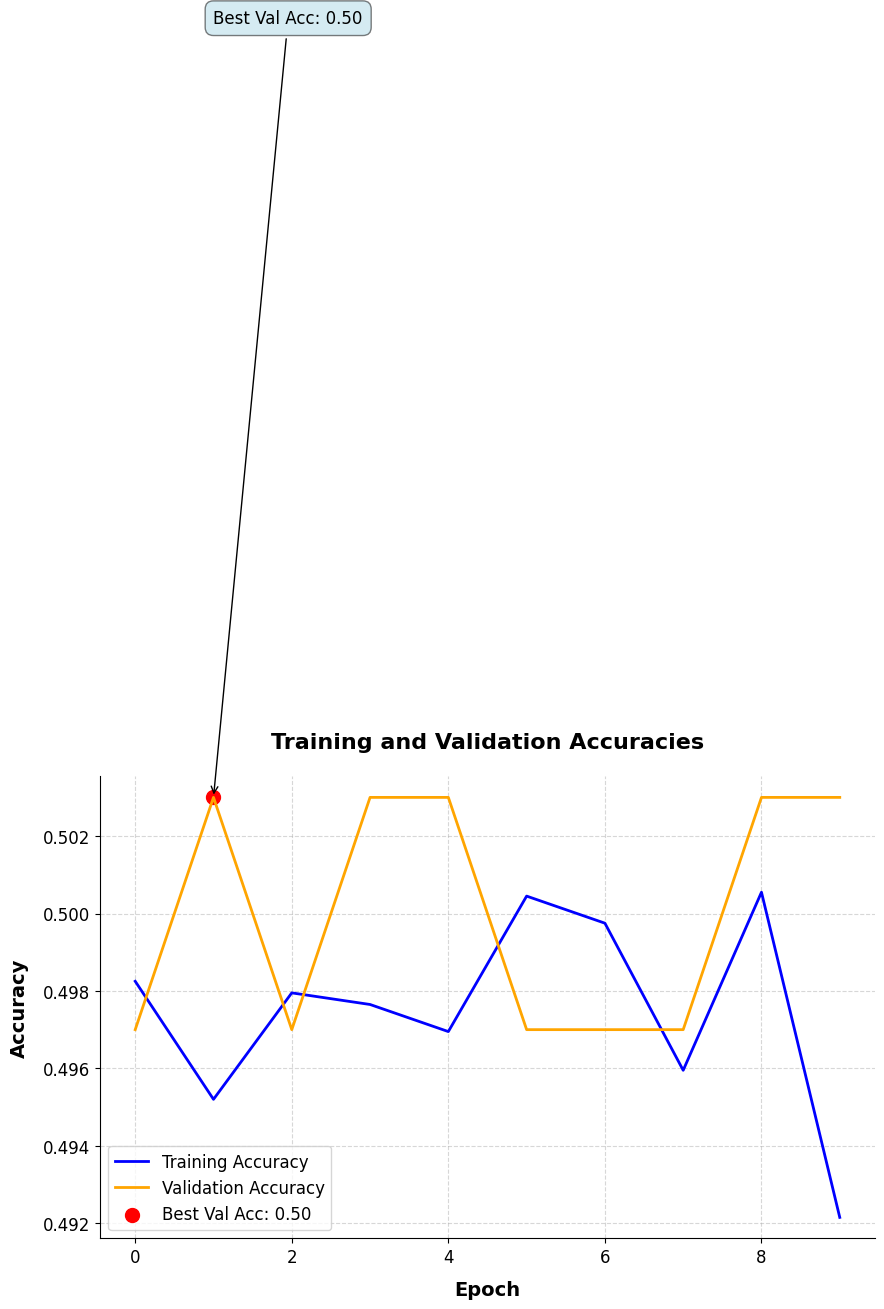

In [16]:
# Plot accuracies with enhanced visualization
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='-', linewidth=2)

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', linewidth=2)

# Highlight best validation accuracy
best_val_acc_epoch = np.argmax(history.history['val_accuracy'])
best_val_acc = history.history['val_accuracy'][best_val_acc_epoch]
plt.scatter(best_val_acc_epoch, best_val_acc, color='red', marker='o', label=f'Best Val Acc: {best_val_acc:.2f}', s=100)

# Add labels and legend
plt.xlabel('Epoch', fontsize=14, fontweight='bold', labelpad=10)
plt.ylabel('Accuracy', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Training and Validation Accuracies', fontsize=16, fontweight='bold', pad=20)
plt.legend(fontsize=12)

# Add grid and remove spines
plt.grid(True, linestyle='--', alpha=0.5)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotate best validation accuracy with arrow and text box
plt.annotate(f'Best Val Acc: {best_val_acc:.2f}', xy=(best_val_acc_epoch, best_val_acc), xytext=(best_val_acc_epoch, best_val_acc + 0.02),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12, bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5))

# Customize tick parameters
plt.tick_params(axis='both', which='major', labelsize=12)

# Show plot
plt.tight_layout()
plt.show()


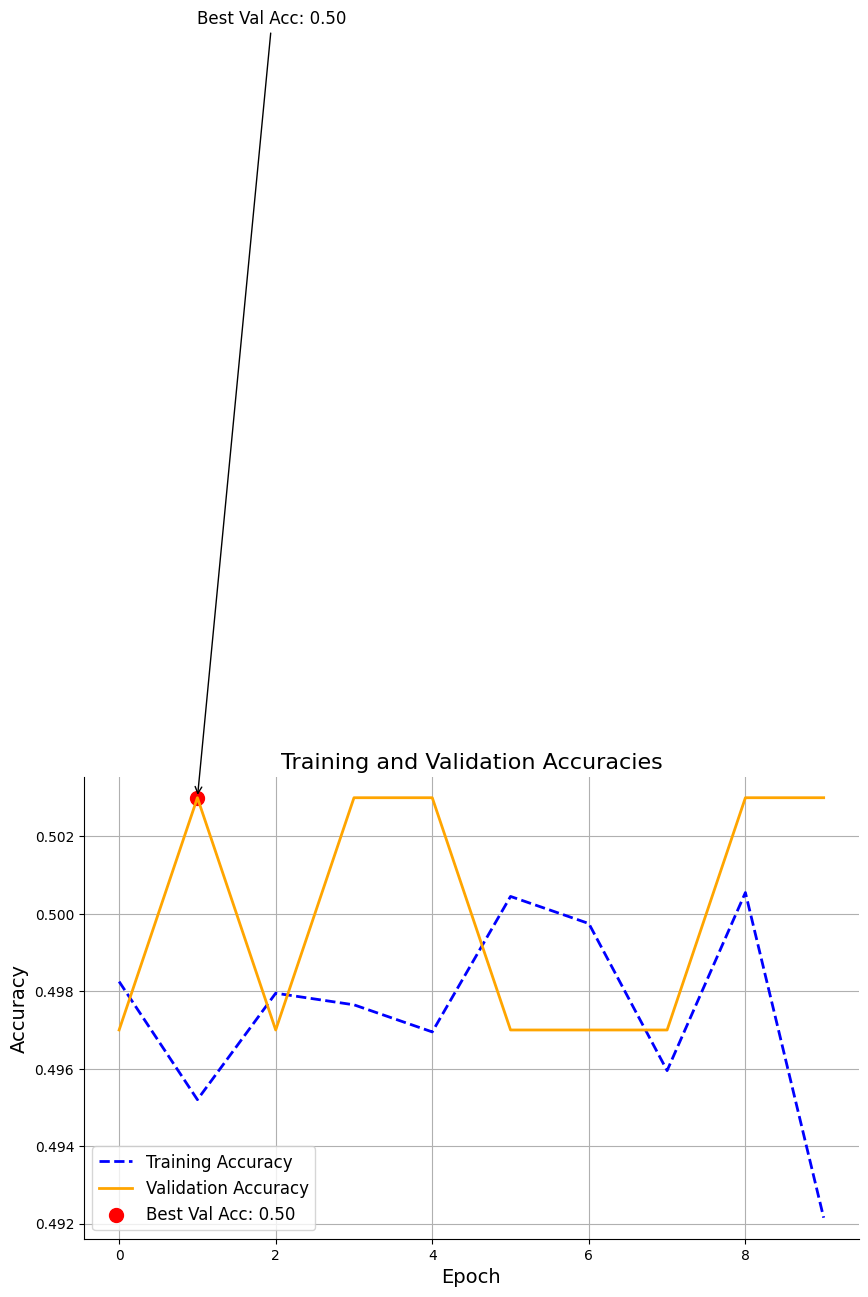

In [17]:
# Plot accuracies with enhanced visualization
plt.figure(figsize=(10, 6))

# Plot training accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue', linestyle='--', linewidth=2)

# Plot validation accuracy
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='orange', linestyle='-', linewidth=2)

# Highlight best validation accuracy
best_val_acc_epoch = np.argmax(history.history['val_accuracy'])
best_val_acc = history.history['val_accuracy'][best_val_acc_epoch]
plt.scatter(best_val_acc_epoch, best_val_acc, color='red', marker='o', label=f'Best Val Acc: {best_val_acc:.2f}', s=100)

# Add labels and legend
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Training and Validation Accuracies', fontsize=16)
plt.legend(fontsize=12)

# Add grid and remove spines
plt.grid(True)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Annotate best validation accuracy
plt.annotate(f'Best Val Acc: {best_val_acc:.2f}', xy=(best_val_acc_epoch, best_val_acc), xytext=(best_val_acc_epoch, best_val_acc + 0.02),
             arrowprops=dict(facecolor='red', arrowstyle='->'), fontsize=12)

# Show plot
plt.show()
